In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
importlib.reload(kgs)
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


local
local
init CUDA
Detected GPU compute capability: 8.9 (arch=sm_89)
GPU max threads per block: 1024
=== Compiling kernel variant: crystal ===
Defines: ENABLE_CRYSTAL_AXES, ENABLE_OVERLAP_AREA, ENABLE_SEPARATION
Command: /usr/local/cuda/bin/nvcc -O3 -use_fast_math --extra-device-vectorization --ptxas-options=-v,--warn-on-spills -arch=sm_89 -DENABLE_CRYSTAL_AXES -DENABLE_OVERLAP_AREA -DENABLE_SEPARATION -cubin /mnt/d//packing/temp/pack_cuda_saved.cu -o /mnt/d//packing/temp/pack_cuda_crystal.cubin
ptxas info    : 0 bytes gmem, 1172 bytes cmem[3]
ptxas info    : Compiling entry function 'multi_boundary_distance_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_distance_list_total
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 36 registers, 404 bytes cmem[0], 16 bytes cmem[2]
ptxas info    : Compiling entry function 'multi_boundary_list_total' for 'sm_89'
ptxas info    : Function properties for multi_boundary_list_tot

In [2]:
from IPython.display import HTML, display, clear_output
kgs.set_float32(True)
pack_cuda._ensure_initialized()


In [3]:
%load_ext pyinstrument

In [4]:
import lbfgs_torch_parallel

Added function: _cubic_interpolate
Added function: _cubic_interpolate_batch
Added function: _strong_wolfe_batched
Added function: lbfgs
{'seed': 0, 'n_generations': 5, 'reduce_h_per_individual': False}


/mnt/d/packing/code/analysis/../core/pack_dynamics.py:61: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  x0 = from_dlpack(x0.toDlpack())
/mnt/d/packing/code/analysis/../core/pack_dynamics.py:93: VisibleDeprecationWarning: This function is deprecated and will be removed in a future release. Use the cupy.from_dlpack() array constructor instead.
  return from_dlpack(tmp_cost[:N].toDlpack()), from_dlpack(res.toDlpack())


Generation 0: Best costs = [[3.829999, 0.057822]]
[[3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 ...
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]]
Generation 1: Best costs = [[3.829999, 0.031764]]
[[3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 ...
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]]
Generation 2: Best costs = [[3.829999, 0.024848]]
[[3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 ...
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]]
Generation 3: Best costs = [[3.829999, 0.018124]]
[[3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 ...
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]
 [3.829999 0.       0.      ]]
Generation 4: Best costs = [[3.829999, 0.014315]]
[[3.82

_     ._   __/__   _ _  _  _ _/_   Recorded: 17:34:40  Samples:  8099
 /_//_/// /_\ / //_// / //_'/ //     Duration: 25.895    CPU time: 25.708
/   _/                      v5.1.1

Cell [8]

25.104 <module>  /tmp/ipykernel_121458/2331357494.py:1
`- 25.092 Runner.run  pack_runner.py:29
   `- 25.085 Orchestrator.run  pack_ga2.py:1148
      |- 18.816 Orchestrator._relax  pack_ga2.py:1136
      |  `- 18.816 run_simulation_list  pack_dynamics.py:575
      |     `- 18.814 OptimizerBFGS.run_simulation  pack_dynamics.py:42
      |        `- 18.763 lbfgs  lbfgs_torch_parallel.py:382
      |           |- 13.376 f_torch  pack_dynamics.py:69
      |           |  |- 12.442 Device.synchronize  <built-in>
      |           |  `- 0.610 CostCompound.compute_cost  pack_cost.py:50
      |           |     `- 0.578 CostCompound._compute_cost  pack_cost.py:91
      |           |        |- 0.297 BoundaryDistanceCost.compute_cost  pack_cost.py:50
      |           |        `- 0.276 [self]  pack_cost.py
      |           `- 4.490 [self]  lbfgs_torch_parallel.py
      |- 5.695 GASinglePopulationOld.apply_selection  pack_ga2.py:902
      |  `- 5.695 GASinglePopulationOld._apply_selection  pack_ga2.py:1020
      |     `- 5.682 compute_genetic_diversity  pack_ga2.py:97
      |        |- 4.592 Device.synchronize  <built-in>
      |        `- 0.842 [self]  pack_ga2.py
      `- 0.340 GASinglePopulationOld.initialize  pack_ga2.py:883
         `- 0.340 GASinglePopulationOld._initialize  pack_ga2.py:954
            `- 0.335 InitializerRandomJiggled.initialize_population  pack_ga2.py:303
               `- 0.335 InitializerRandomJiggled._initialize_population  pack_ga2.py:320
                  `- 0.270 DynamicsInitialize.run_simulation  pack_dynamics.py:353
                     `- 0.268 DynamicsInitialize.run_simulation  pack_dynamics.py:238
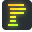

In [7]:
%%pyinstrument
kgs.profiling=True
import pack_ga
kgs.enable_module_profiling(lbfgs_torch_parallel)
import pack_runner
runner = pack_runner.baseline_runner(fast_mode=False)
runner.use_missing_value = True
runner.modifier_dict['n_generations'] = pack_runner.pm(5, lambda r:5, pack_runner.set_orchestrator_prop)
runner.base_ga.ga.do_legalize = False
runner.base_ga.ga.N_trees_to_do = 40
runner.run()


In [6]:
kgs.print_module_profile()


Timer unit: 1e-09 s

Total time: 0 s
File: /mnt/d/packing/code/analysis/../core/lbfgs_torch_parallel.py
Function: _cubic_interpolate at line 13



Line #      Hits         Time  Per Hit   % Time  Line Contents
    13                                           def _cubic_interpolate(x1, f1, g1, x2, f2, g2, bounds=None):
    14                                               # ported from https://github.com/torch/optim/blob/master/polyinterp.lua
    15                                               # Compute bounds of interpolation area
    16                                               if bounds is not None:
    17                                                   xmin_bound, xmax_bound = bounds
    18                                               else:
    19                                                   xmin_bound, xmax_bound = (x1, x2) if x1 <= x2 else (x2, x1)
    20                                           
    21                                               # Code for most common case: cubic interpolation of 2 points
    22                                               #   w/ function and derivative values for both
    